# Casino Jack - Starter Code

In this code, we will analyze the effect of ad spending on box office revenues for a set of films. We will then use this relationship to optimize our ad spending on the film "Casino Jack."

## Importing

Like all of our starter code, we will start by loading a set of "modules" that contain useful functionality for the assignment. We will use most of these modules in every set of starter code we have, but we will customize the set for some assignment specific functionality. The way this works is we specify the name of a module first, and then we can either import it with a shorthand phrase of import certain functions.

For example, the code `import numpy as np` says to import the numpy module (a module for handling large datasets as arrays that is very common in data science) and call it `np`. Then if we ever want to use a function from that module, for example the `array` function, we would type `np.array(x)` (where `x` is the data we are giving to the function).

Alternatively, we can import specific functions directly. Below we write `from scipy.optimize import minimize_scalar`, which says to take "from" the `scipy.optimize` module the function `minimize_scalar`. This allows us to use the function `minimize_scalar` just by writing `minimize_scalar`.

We can also import all functions from a module at a time like we do with `from math import *`. This imports all of the functions from math, which includes things like `log()` to calculate the natural logarithm of a number.

In [1]:
import numpy as np
import pandas as pd
from math import *
from sklearn.impute import SimpleImputer
import statsmodels.formula.api as smf
from scipy.optimize import minimize_scalar
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

In [3]:
# This sets some nicer defaults for plotting.
# This must be run in a separate cell from importing matplotlib due to a bug.
params = {'legend.fontsize': 'large',
          'figure.figsize': (11.0, 11.0),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'}
mpl.rcParams.update(params)

# This makes it so that the pandas dataframes don't get truncated horizontally.
pd.options.display.max_columns = 200

If you are uncertain what a function does, you can look up help in the jupyter notebook by writing `?np.array` (replace `np.array` with the relevant function). Try it below.

In [4]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

Sometimes the documentation that it produces helps you to figure out what you need to put in the function (you can see it gives you some examples), but sometimes, it's still quite hard to parse. In these cases, I recommend you google the function with a specific question (or an error message if you are getting an error message), and you will likely find an explanation. The website [stackoverflow.com](http://www.stackoverflow.com) is a website that you will likely become very familiar with. It is a community driven question and answering platform for coding related questions. It is also often the most useful (and top) search result that comes from googling something.

## Load and clean the data

We first have to load the data. We will read it in as a Pandas "dataframe". Dataframes are one of the most important tools for a data scientist. They store data in a structured format, kind of like an excel spreadsheet.

We can reference the data set with "Casino.csv" because our Juptyer Notebook is in the same folder as the data set. If the notebook was in a different folder, we would have to provide a longer path to the file. If you ever create your own notebook and try to read in a file (or you upload new data to use in a Jupyter Notebook), you will either have to put the notebook and the data set in the same folder, or you will have to give it a more complete path to the data set. We will see examples of this later in the course.

We store the data in a "variable" called `films_df`, and anytime we want to reference the data, we will use that variable.

In [5]:
films_df = pd.read_csv("Casino.csv")

Let's look at the first few rows. We use a built in `method` (a function that is specific to a certain kind of variable, in this case a pandas dataframe) called `head`. This will give a view of the dataframe that should look very familiar to any excel jockey.

In [6]:
films_df.head()

,Index,Title,RT Critic,RT User,IMDB User,TV_0,Print_0,TV_1,Print_1,Screens_1,BO_1,TV_2,Print_2,Screens_2,BO_2,TV_3,Print_3,Screens_3,BO_3,TV_4,Print_4,Screens_4,BO_4,TV_5,Print_5,Screens_5,BO_5,TV_6,Print_6,Screens_6,BO_6,TV_7,Print_7,Screens_7,BO_7,TV_8,Print_8,Screens_8,BO_8,TV_9,Print_9,Screens_9,BO_9,TV_10,Print_10,Screens_10,BO_10,Distributor,Genre,Runtime,MPAA Rating,Production Budget
0,1,127 Hours,0.93,0.84,7.9,98800,174900,204400,338700,4.285714,375802,1137000,560000,21.857143,568334,814500,898500,149.571429,1611343,644000,569800,263.571429,2001216,113900,535000,391.714286,1961284,300,267700,375.142857,1329626,36200,180000,229.285714,735996,0,84300,90.000000,333941,26600,46800,83.571429,322655,23800,47900,70.142857,212401,Fox Searchlight,Drama,1 hrs. 33 min.,R,18000000.0
1,2,2 Days In Paris,0.85,0.71,6.9,0,40600,0,41800,8.000000,226825,0,83500,8.000000,169971,0,287400,54.000000,480776,0,294100,79.571429,699404,0,232000,92.000000,479395,0,154500,100.571429,400919,0,69800,102.285714,282365,0,37000,100.285714,224410,0,7700,82.428571,154325,0,3000,50.857143,71725,Samuel Goldwyn,Comedy / Drama,1 hrs. 34 min.,R,NaN
2,3,500 Days Of Summer,0.87,0.81,7.9,198200,211400,556700,486600,26.285714,1332128,1400100,665200,78.571429,2514909,1285300,510900,247.000000,4106775,615000,599000,754.142857,5729845,271000,471800,967.000000,4434446,10700,220000,904.714286,3053734,595000,223800,810.000000,2524749,104900,222700,779.714286,2432649,0,165000,652.857143,1357227,0,100000,492.714286,740878,Fox Searchlight,Romance,1 hrs. 35 min.,PG-13,7500000.0
3,4,A Better Life,0.85,0.79,6.4,161600,67900,199800,300300,4.000000,83668,151400,218100,11.857143,146743,46600,459600,150.142857,464302,0,503100,205.000000,479417,0,113900,174.571429,296264,0,19700,88.571429,99889,0,1900,52.714286,41758,0,1200,37.000000,21562,0,0,57.000000,32189,0,0,25.000000,14849,Summit Entertainment,Drama,1 hrs. 37 min.,PG-13,10000000.0
4,5,A Dirty Shame,0.53,0.49,5.0,345300,495400,0,3800,2.000000,182,0,197600,101.142857,506832,0,82600,97.571429,307155,0,24000,59.714286,143180,0,15500,31.142857,62835,0,2600,19.285714,25747,0,0,5.142857,4415,0,0,3.000000,2161,0,0,2.714286,1478,0,0,1.000000,570,Fine Line,Comedy,1 hrs. 28 min.,NC-17,15000000.0


What does `head` do?

In [7]:
?films_df.head

Signature: films_df.head(n: 'int' = 5) -> 'NDFrameT'
Docstring:
Return the first `n` rows.

This function returns the first `n` rows for the object based
on position. It is useful for quickly testing if your object
has the right type of data in it.

For negative values of `n`, this function returns all rows except
the last `|n|` rows, equivalent to ``df[:n]``.

If n is larger than the number of rows, this function returns all rows.

Parameters
----------
n : int, default 5
    Number of rows to select.

Returns
-------
same type as caller
    The first `n` rows of the caller object.

See Also
--------
DataFrame.tail: Returns the last `n` rows.

Examples
--------
>>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
>>> df
      animal
0  alligator
1        bee
2     falcon
3       lion
4     monkey
5     parrot
6      shark
7      whale
8      zebra

Viewing the first 5 lines

>>> df.head()
      

How big is our dataset? We can use another variable specific value called `shape`. Now this is a property (something that just is for the dataframe), not a function. So, we don't put `()` after it.

In [8]:
films_df.shape

(341, 52)

What does it actually tell us? Well, the first number is the number of rows, and the second is the number of columns. So, we have 341 movies, and 52 pieces of data about each movie (though some could be missing for particular movies).

In fact, we should take a closer look at our dataframe to see if we have missing data. Below, I define a "function" that takes in a dataframe and spits out nice summary of a bunch of different factors for each column in the dataframe. We will use this function in nearly every assignment we have, but we don't have to rewrite it. We can just copy and paste it to our new code. Also, we only have to define it once. Once it has been defined, we can use it in the rest of our code. Let's use it to get a better understanding of this particular dataframe.

In [9]:
def summarize_dataframe(df):
    """Summarize a dataframe, and report missing values."""
    missing_values = pd.concat([pd.DataFrame(df.columns, columns=['Variable Name']), 
                      pd.DataFrame(df.dtypes.values.reshape([-1,1]), columns=['Data Type']),
                      pd.DataFrame(df.isnull().sum().values, columns=['Missing Values']), 
                      pd.DataFrame([df[name].nunique() for name in df.columns], columns=['Unique Values'])], 
                     axis=1).set_index('Variable Name')
    with pd.option_context("display.max_rows", 1000):
        display(pd.concat([missing_values, df.describe(include='all').transpose()], axis=1).fillna(""))




summarize_dataframe(films_df)

,Data Type,Missing Values,Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,int64,0,341,341.0,,,,171.0,98.582453,1.0,86.0,171.0,256.0,341.0
Title,object,0,341,341.0,341,127 Hours,1,,,,,,,
RT Critic,float64,0,77,341.0,,,,0.722346,0.208635,0.0,0.62,0.78,0.88,1.0
RT User,float64,0,60,341.0,,,,0.687243,0.146112,0.21,0.59,0.71,0.8,0.93
IMDB User,float64,0,35,341.0,,,,6.402053,2.128496,0.0,6.5,7.0,7.5,8.3
TV_0,int64,0,172,341.0,,,,167263.343109,413791.378922,0.0,0.0,1900.0,128400.0,3266600.0
Print_0,int64,0,278,341.0,,,,96990.615836,107444.674545,0.0,19500.0,62300.0,147800.0,683500.0
TV_1,int64,0,175,341.0,,,,236136.070381,593978.847381,0.0,0.0,4700.0,129000.0,4252000.0
Print_1,int64,0,315,341.0,,,,282886.217009,290607.267657,0.0,64600.0,199100.0,388900.0,1932800.0
Screens_1,float64,0,106,341.0,,,,15.564726,35.119408,1.0,4.0,6.0,11.571429,359.142857


Let's look at a particular column, "Production Budget". How many missing values are there?

There is a lot of missing values for the "Production Budget". We can either throw away the column, or we have to fill in the missing values using a "best guess". This is called "imputing data". This data is made up, but often it works pretty well in practice.

Let's impute missing production budget data. The standard way to do this for a continuous variable is to replace missing data with the mean of the non-missing data in the column. The "SimpleImputer" is an "sklearn" function, which will be a very important module for us. They all follow a pattern that you will get used to where you have to "fit" the imputer (in this case, that means to calculate the mean for the "Production Budget" column) and then "transform" the data. You can do this in two separate steps or in one (like we do below). Don't worry too much about this yet. You'll see this plenty more times going forward.

In [10]:
films_df[['Production Budget']] = SimpleImputer(missing_values=np.nan).fit_transform(films_df[['Production Budget']])

Did it work? Let's check.

In [11]:
summarize_dataframe(films_df[['Production Budget']])

,Data Type,Missing Values,Unique Values,count,mean,std,min,25%,50%,75%,max
Production Budget,float64,0,88,341.0,1.202166e+07,1.020716e+07,15000.0,6000000.0,1.202166e+07,13000000.0,76000000.0


Notice that I didn't summarize the whole dataframe again. I just pulled out a single column of the dataframe and summarized it. I did this by writing `films_df[['Production Budget']]`. Let's take a look at what it actually gives us when we do this:

In [12]:
films_df[['Production Budget']].head()

,Production Budget
0,1.800000e+07
1,1.202166e+07
2,7.500000e+06
3,1.000000e+07
4,1.500000e+07


It's just a dataframe that only has one columns, "Production Budget". 

We don't want to work with all different ad channels, and right now, they are broken up into TV and print. So, let's compute a total Ad spend for each week.

Naively, we'd have to do something silly like:

In [13]:
films_df['Ad_0'] = films_df['TV_0'] + films_df['Print_0']

For every single week (there are ten of them). However, ain't nobody got time for that. Instead, we are going to be as lazy as possible by taking advantage of the power of programming!

We will do this by using a `for` loop. This will basically loop over a list of things. In this case, that list will be a set of integers (0 through 10), and then it will create a "string" by adding the integer (as a string) to another string. To understand this, look at the next line of code.

In [14]:
"Ad_" + str(0)

'Ad_0'

What did it return? This is called "string concatenation", i.e. putting two strings together. Notice that we "add" them. Also, notice that I had to use the function `str` to turn a number `0` into a string in order to add that. If I had tried `"Ad_" + 0`, I would have gotten an error because you can't add a string and a number together. Don't worry, this is confusing to experienced programmers as well.

So, if we want to loop through and print a bunch of strings, we can do that.

In [15]:
for i in range(0,11):
    print("Ad_" + str(i))

Ad_0
Ad_1
Ad_2
Ad_3
Ad_4
Ad_5
Ad_6
Ad_7
Ad_8
Ad_9
Ad_10


Here, I used the `print` function to print the strings because generally, Jupyter notebooks only return the last thing that was returned out of a cell, so if we did not use the print function, the output would have been empty because of the way for loops return. You can create a new code cell and confirm that for yourself.

Notice that I used the function `range(0,11)` to give me a list of integers from 0 to 10 (for programming specific reasons, it doesn't include the last number, so we have to go to 11). Also, I indented the line `print("Ad_" + str(i))`. Anything indented is part of the for loop, anything not indented is not. For example:

In [16]:
for i in range(0,11):
    print("Ad_" + str(i))
    
    print("Still in the loop.")

print("Out of the loop. Only printed once, not 10 times.")

Ad_0
Still in the loop.
Ad_1
Still in the loop.
Ad_2
Still in the loop.
Ad_3
Still in the loop.
Ad_4
Still in the loop.
Ad_5
Still in the loop.
Ad_6
Still in the loop.
Ad_7
Still in the loop.
Ad_8
Still in the loop.
Ad_9
Still in the loop.
Ad_10
Still in the loop.
Out of the loop. Only printed once, not 10 times.


We can use this to easily compute all 10 total ad spends in one fell swoop. This loops through and adds all of the total Ad spends to the `films_df` dataframe.

In [17]:
for i in range(0,11):
    films_df['Ad_' + str(i)] = films_df['TV_' + str(i)] + films_df['Print_' + str(i)]

We also want to get the total ad spend for the entire ten week period (plus week 0). We could write something ridiculous like `films_df['Total_Ad'] = films_df['Ad_0'] + films_df['Ad_1'] + ...`, but again, that would take forever, and no one has time for that. Instead, we are going to use a nifty python trick called list comprehension.

I can use almost natural language to get a whole list of things at once. For example:

In [18]:
['Ad_' + str(i) for i in range(0,11)]

['Ad_0',
 'Ad_1',
 'Ad_2',
 'Ad_3',
 'Ad_4',
 'Ad_5',
 'Ad_6',
 'Ad_7',
 'Ad_8',
 'Ad_9',
 'Ad_10']

Note that the above syntax looked quite similar to the for loop syntax, but somehow backwards. It behaves very much like a for loop, but you can write it all in one line.

Then, I can create a dataframe that just has the `Ad_x` columns, like so:

In [19]:
films_df[['Ad_' + str(i) for i in range(0,11)]]

,Ad_0,Ad_1,Ad_2,Ad_3,Ad_4,Ad_5,Ad_6,Ad_7,Ad_8,Ad_9,Ad_10
0,273700,543100,1697000,1713000,1213800,648900,268000,216200,84300,73400,71700
1,40600,41800,83500,287400,294100,232000,154500,69800,37000,7700,3000
2,409600,1043300,2065300,1796200,1214000,742800,230700,818800,327600,165000,100000
3,229500,500100,369500,506200,503100,113900,19700,1900,1200,0,0
4,840700,3800,197600,82600,24000,15500,2600,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
336,193000,322700,377500,480200,323700,49000,30000,3600,0,0,0
337,0,8800,12800,20200,28900,29700,20600,15700,17400,13500,6800
338,373800,378000,380300,349600,289200,112500,0,0,0,0,0
339,185100,381400,249200,205300,132400,212000,38800,16200,14400,4500,4500


Notice that this takes that list, and it basically says, give me the dataframe with only columns from that list kind of like we did "Production Budget" earlier.

Finally, we can sum up the columns all at once, giving us the right answer. We will use a dataframe method called `sum` for this. This method operates on "axis" of the dataframe. Axis 0 is the rows, and axis 1 is the columns, and we want to sum up over columns, so putting it altogether:

In [20]:
films_df['Total_Ad'] = films_df[['Ad_' + str(i) for i in range(0,11)]].sum(axis=1)

Now lets do the same things for the total box office take over the whole range. Note that there is no `BO_0` (since time 0 is before the movies release), so we modify the `range` call a little bit. Can you spot the difference?

In [21]:
films_df['Total_BO'] = films_df[['BO_' + str(i) for i in range(1,11)]].sum(axis=1)

Finally, we only are interested in movies that have ad spending (since we are trying to optimize ad spending), and if we include the subset of (weird) movies that don't have ad spending, we will likely get weird results. So, we need to figure out which movies don't have any ad spending. This means that "Total_Ad" (computed above) will be 0.

To do this, we can take advantage of conditional operations. The following code returns a pandas series (like a dataframe, but only one unnamed column) with a value of `True` if the "Total_Ad" spend is `0` and `False` otherwise.

In [22]:
films_df['Total_Ad'] == 0

0      False
1      False
2      False
3      False
4      False
       ...  
336    False
337    False
338    False
339    False
340    False
Name: Total_Ad, Length: 341, dtype: bool

What we can see is that the first and last five films have ad spend. That's not super informative. However, we can use this to create a new column that indicates whether or not a movie had ad spend with the following:

In [23]:
films_df['No_Ad'] = films_df['Total_Ad'] == 0

Note that we weirdly have two "equal" signs (or kind of three) in the above expression. This is becauase one of the equal signs (the `==`) is a logical operator that says return `True` if these things are equal, and the other is an assignment operator that says set `films_df['No_Ad']` equal to the following.

Let's look at our dataframe again. Do you see the new columns?

In [24]:
summarize_dataframe(films_df)

,Data Type,Missing Values,Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Index,int64,0,341,341.0,,,,171.0,98.582453,1.0,86.0,171.0,256.0,341.0
Title,object,0,341,341.0,341,127 Hours,1,,,,,,,
RT Critic,float64,0,77,341.0,,,,0.722346,0.208635,0.0,0.62,0.78,0.88,1.0
RT User,float64,0,60,341.0,,,,0.687243,0.146112,0.21,0.59,0.71,0.8,0.93
IMDB User,float64,0,35,341.0,,,,6.402053,2.128496,0.0,6.5,7.0,7.5,8.3
TV_0,int64,0,172,341.0,,,,167263.343109,413791.378922,0.0,0.0,1900.0,128400.0,3266600.0
Print_0,int64,0,278,341.0,,,,96990.615836,107444.674545,0.0,19500.0,62300.0,147800.0,683500.0
TV_1,int64,0,175,341.0,,,,236136.070381,593978.847381,0.0,0.0,4700.0,129000.0,4252000.0
Print_1,int64,0,315,341.0,,,,282886.217009,290607.267657,0.0,64600.0,199100.0,388900.0,1932800.0
Screens_1,float64,0,106,341.0,,,,15.564726,35.119408,1.0,4.0,6.0,11.571429,359.142857


Which movies spent nothing on TV and print advertising? How well did they do at the box office?  Note that the ad spends for these movies are not missing values. For instance, Paramount intentionally spent no money on TV or print advertising for Paranormal Activity. They used social media to promote the movie: see http://blogs.indiewire.com/thompsononhollywood/with_paranormal_activity_paramount_sets_new_marketing_model.

To look at these weird movies, we will use a method for a dataframe called `loc`. This allows us to access only the rows that have `films_df['No_Ad']` of `True` and then we include "Title" and "Total_BO" in the included dataframe (like we did above).

In [25]:
films_df.loc[films_df['No_Ad']][["Title", "Total_BO"]]

,Title,Total_BO
6,A Home At The End Of The World,773525
63,Catfish,2944941
102,G,2792162
105,Get Low,7569511
168,Mirrormask,720720
185,Noah's Arc - Jumping The Broom,530835
187,Notorious Bettie Page,1123566
193,Paranormal Activity,95276766
215,Separate Lies,665139
236,Tamara Drewe,412021


Week 2 is a critical week in a movie's evolution. Reviews are out and the first week's box office creates word-of-mouth. If we don't have ad spend in week 2, something is up with the movie. We will restrict our analysis to movies that have ad spend in week 2.

Create a new data frame of films that had some ads in Week 2 called `df`. Using the short name `df` will make some of the further code easier to read. We are again, using this `loc` method, but this time to pull out all movies with "Ad_2" greater than 0.

In [26]:
df = films_df.loc[films_df['Ad_2'] > 0]

How many movies did we end up with?

In [27]:
df.shape

(325, 66)

## Conduct exploratory data analysis (EDA)

Now, we will do some initial data exploration. You should have already done a lot of this in tableau, but you can also do visual analytics in python. To be honest, plotting in python is quite complicated at times, so you will likely spend most of your time using Tableau for visual analytics, but it is good to have a basic familiarity with plotting in python.

For most of the rest of the code, I will include much briefer explanations. This is because a lot of the code is quite specific to this exercise, and therefore, not as essential that you understand the fine details. Also, I'd encourage you to try to understand the code directly by copying it and changing things until you understand what each piece does.

Which week of the ten weeks after release has the highest average ad spending?

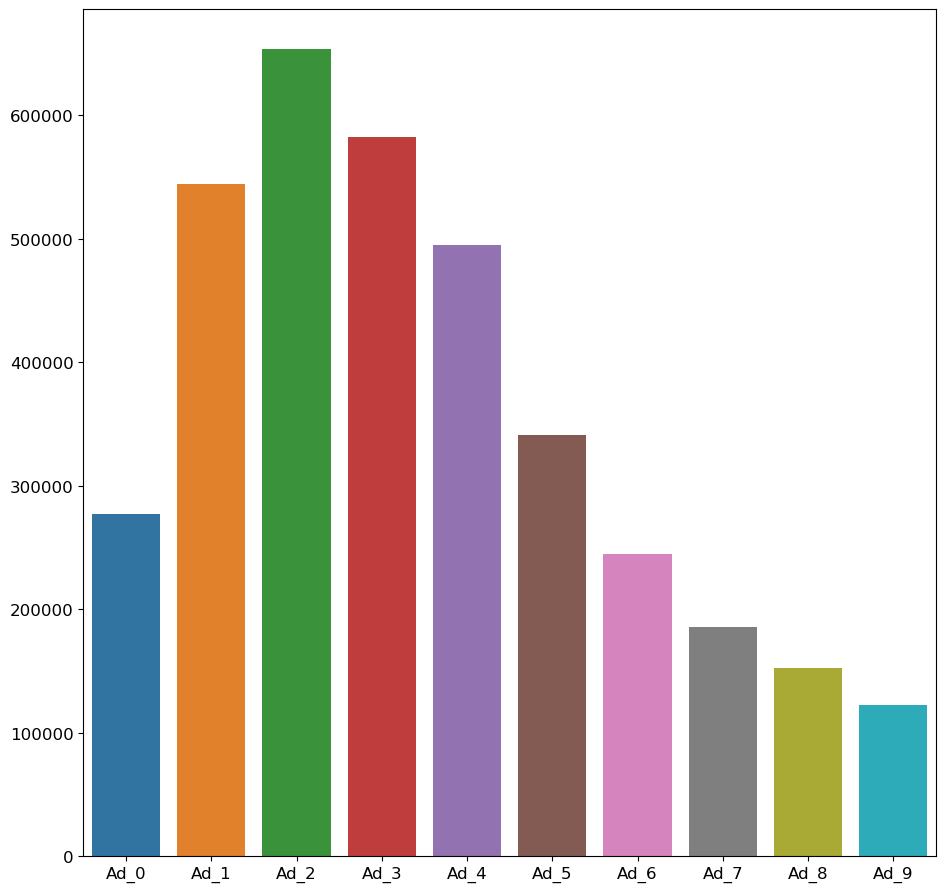

In [28]:
sns.barplot(data=df[["Ad_" + str(i) for i in range(0,10)]], errorbar=None);

## Transformations

Often times, it will be beneficial to apply transformation to the data set. For example, in this exercise, we are fitting a linear regression, a.k.a. a straight line. If the data does not have a linear relationship (i.e. you can draw a straight line through it), then a linear regression won't fit. The most common transformation in this case is a log transformation.

Should we apply any log transformations? Are any of the variables right-skewed? For log transformations of variables, use log(1 + X) instead of log(X). The transformation log(X) is problematic when X sometimes takes the value 0.

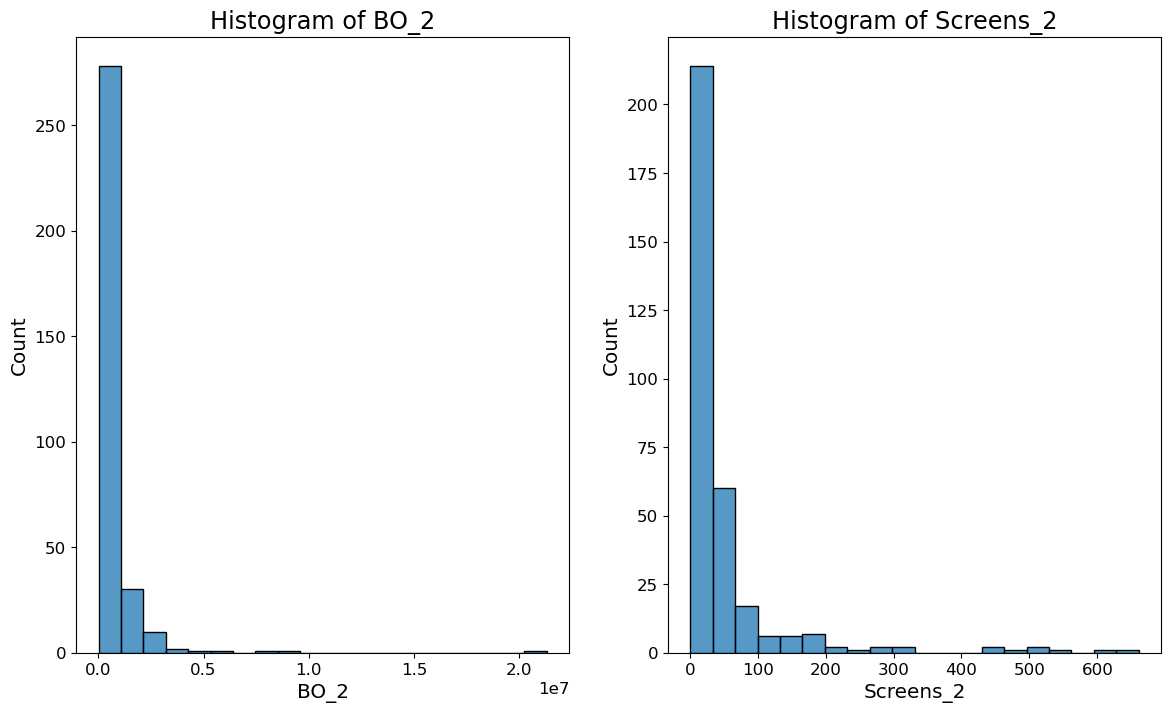

In [29]:
f, axes = plt.subplots(1,2, figsize=(14,8))
axes[0].set_title("Histogram of BO_2")
sns.histplot(df["BO_2"], bins=20, kde=False, ax=axes[0])
axes[1].set_title("Histogram of Screens_2")
sns.histplot(df["Screens_2"], bins=20, kde=False, ax=axes[1]);

Why does a log transformation help with right skewed data? Look at the log curve. It pulls higher values down more. On the x-axis in the plot below, the points 2, 4, and 8 are right-skewed. On the y-axis, are the points log(2), log(4), and log(8) right-skewed? Each change on the y-axis (from one point to the next) goes with what type of change on the x-axis?

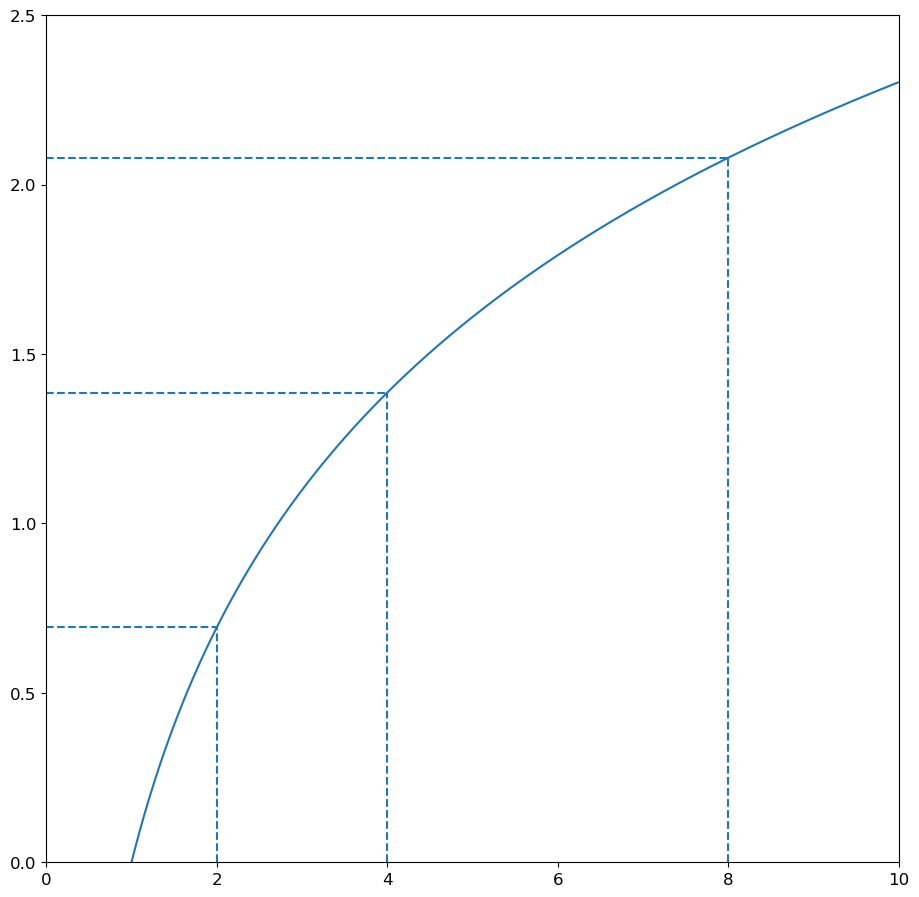

In [30]:
x = np.arange(0.001,10, .01)
y = np.log(x)

plt.plot(x,y)
plt.ylim(0,2.5)
plt.xlim(0,10)
plt.axhline(y=log(2), xmin=0, xmax=.2, linestyle='--')
plt.axvline(x=2, ymin=0, ymax=log(2)/2.5, linestyle='--')
plt.axhline(y=log(4), xmin=0, xmax=.4, linestyle='--')
plt.axvline(x=4, ymin=0, ymax=log(4)/2.5, linestyle='--')
plt.axhline(y=log(8), xmin=0, xmax=.8, linestyle='--')
plt.axvline(x=8, ymin=0, ymax=log(8)/2.5, linestyle='--')
plt.show()

Consider the four ways we can transform (or not) the variables BO_2 and Screens_2.

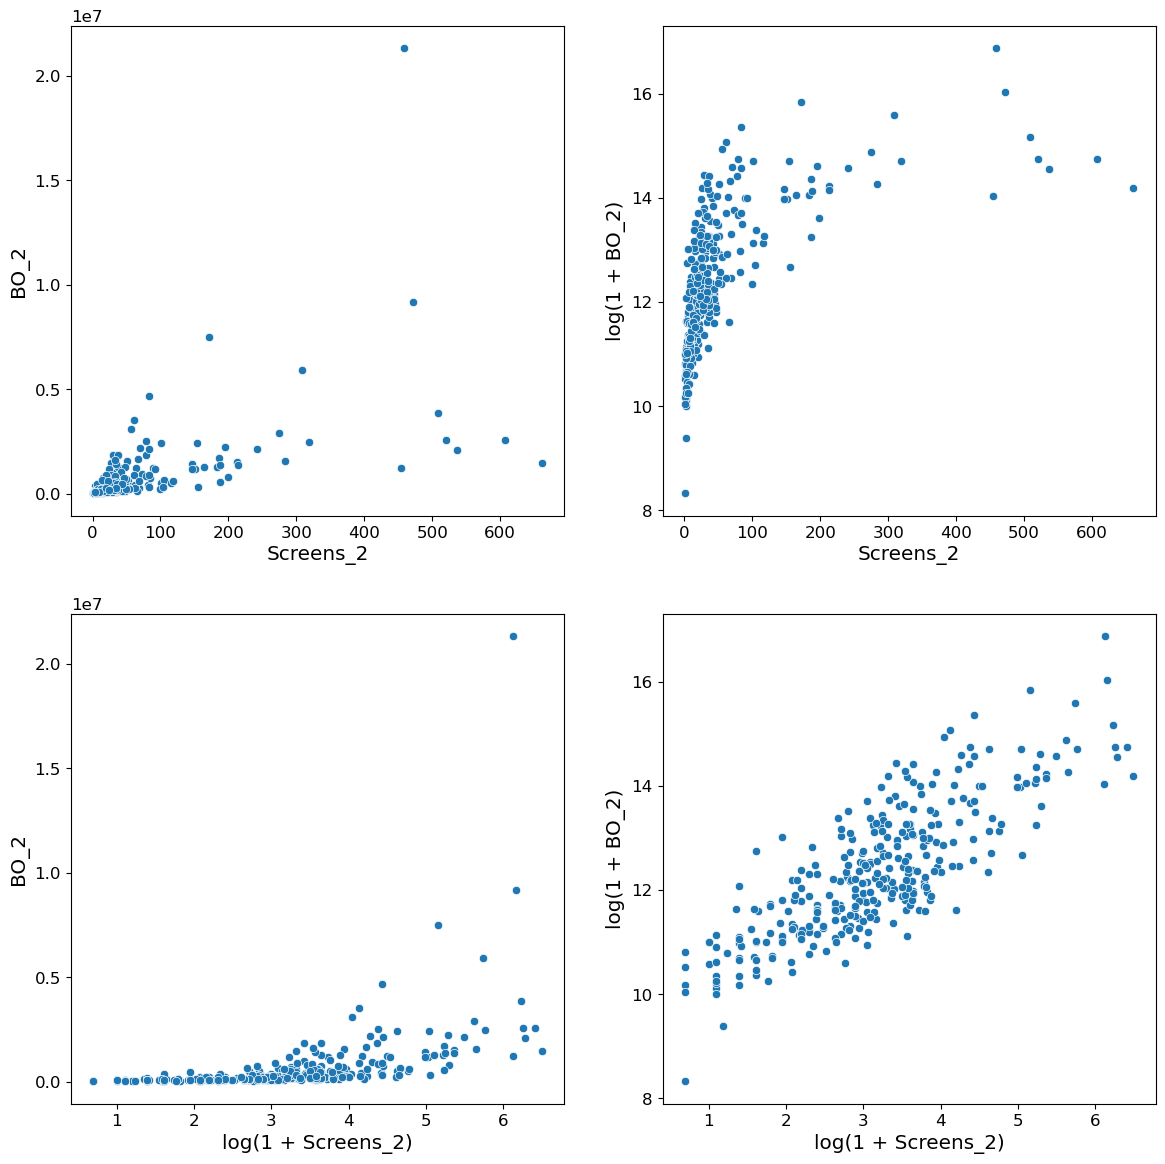

In [31]:
f, axes = plt.subplots(2,2, figsize=(14,14))
sns.scatterplot(x = df["Screens_2"], y=df["BO_2"], ax=axes[0,0])
axes[0,0].set_xlabel("Screens_2")
axes[0,0].set_ylabel("BO_2")
sns.scatterplot(x = df["Screens_2"], y=np.log(1 + df["BO_2"]), ax=axes[0,1])
axes[0,1].set_xlabel("Screens_2")
axes[0,1].set_ylabel("log(1 + BO_2)")
sns.scatterplot(x = np.log(1 + df["Screens_2"]), y=df["BO_2"], ax=axes[1,0])
axes[1,0].set_xlabel("log(1 + Screens_2)")
axes[1,0].set_ylabel("BO_2")
sns.scatterplot(x = np.log(1 + df["Screens_2"]), y=np.log(1 + df["BO_2"]), ax=axes[1,1])
axes[1,1].set_xlabel("log(1 + Screens_2)")
axes[1,1].set_ylabel("log(1 + BO_2)")
plt.show()

Once we apply log transformations to both BO_2 and Screens_2, how well will a linear model fit the relationship between the two variables?  Let's fit a line to the data.

NOTE: the log transformation is just one type of "Box-Cox" transformation. The Box-Cox transformation is $(x^\lambda - 1)/\lambda$ for $-2 <= \lambda <= 2$.  When $\lambda  = 0$, the transformation is the log transformation.  

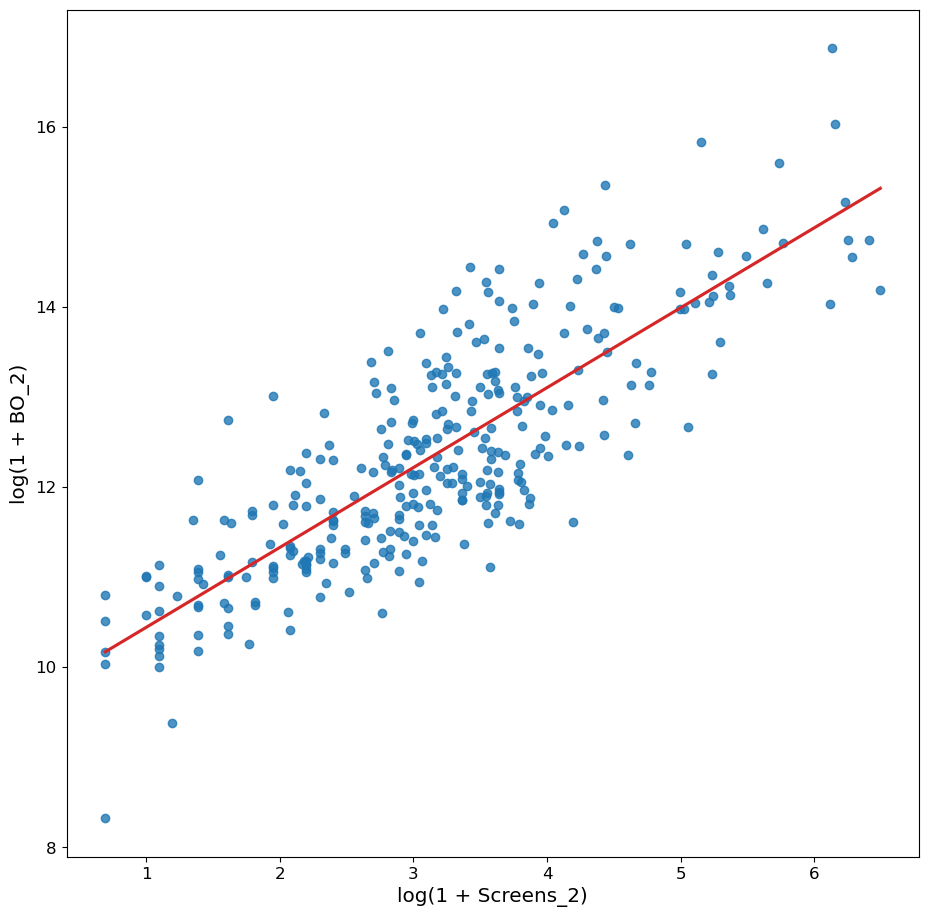

In [32]:
sns.regplot(x = np.log(1 + df["Screens_2"]), y=np.log(1 + df["BO_2"]), color='tab:red', ci=None, scatter_kws={"color": "tab:blue"})
plt.xlabel("log(1 + Screens_2)")
plt.ylabel("log(1 + BO_2)")
plt.show()

## Lags

Should we include a lagged variable to help predict the box office from one week to the next? 

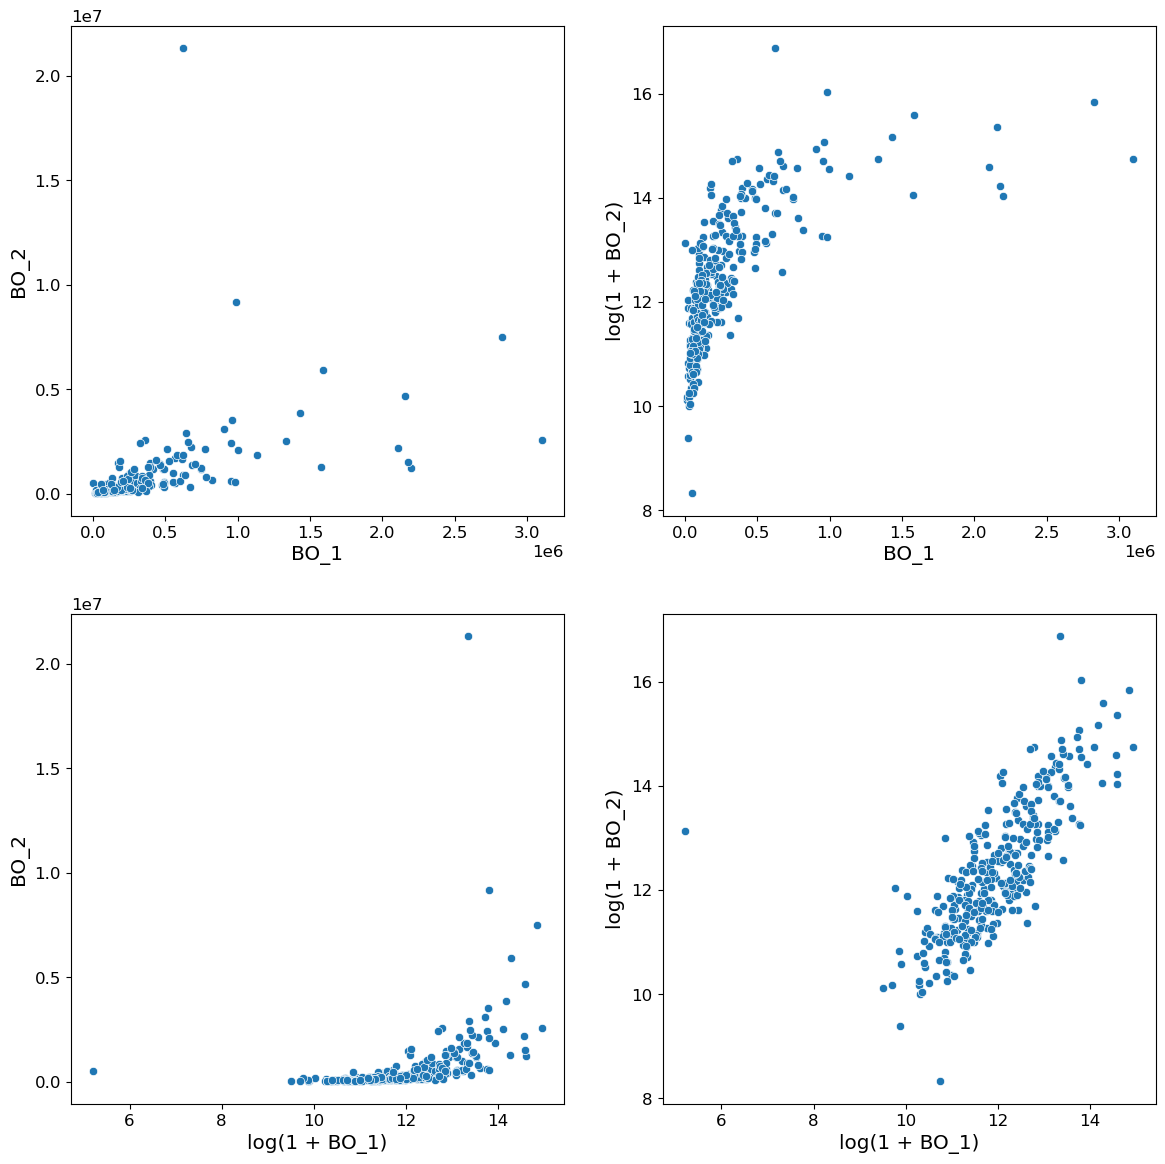

In [33]:
f, axes = plt.subplots(2,2, figsize=(14,14))
sns.scatterplot(x = df["BO_1"], y=df["BO_2"], ax=axes[0,0])
axes[0,0].set_xlabel("BO_1")
axes[0,0].set_ylabel("BO_2")
sns.scatterplot(x = df["BO_1"], y=np.log(1 + df["BO_2"]), ax=axes[0,1])
axes[0,1].set_xlabel("BO_1")
axes[0,1].set_ylabel("log(1 + BO_2)")
sns.scatterplot(x = np.log(1 + df["BO_1"]), y=df["BO_2"], ax=axes[1,0])
axes[1,0].set_xlabel("log(1 + BO_1)")
axes[1,0].set_ylabel("BO_2")
sns.scatterplot(x = np.log(1 + df["BO_1"]), y=np.log(1 + df["BO_2"]), ax=axes[1,1])
axes[1,1].set_xlabel("log(1 + BO_1)")
axes[1,1].set_ylabel("log(1 + BO_2)")
plt.show()

## Interactions

Should we interact ad spend and critic reviews? In other words, are ads more effective when a movie is more highly rated? In which weeks? On the Rotten Tomatoes web site, a movie is fresh (and marked with a bright red tomato) if the critic rating is 60% or higher or rotten (and marked with a splattered green tomato) if the rating is below 60%. 

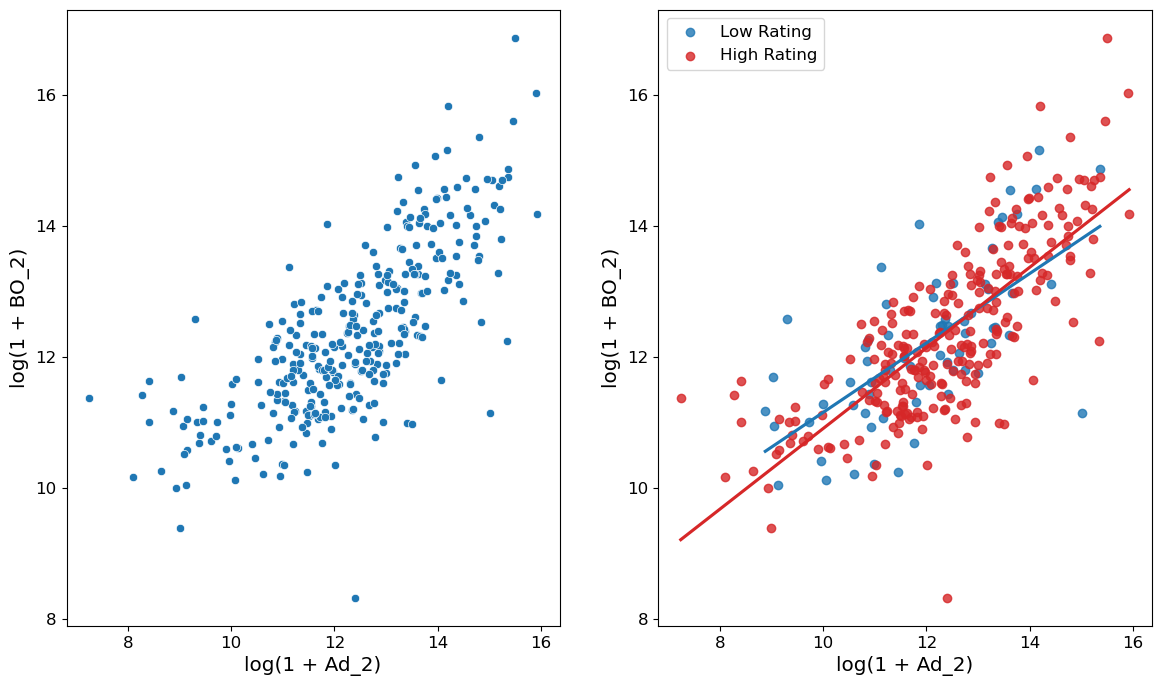

In [34]:
f, axes = plt.subplots(1,2, figsize=(14,8))
sns.scatterplot(x = np.log(1 + df["Ad_2"]), y=np.log(1 + df["BO_2"]), ax=axes[0])
axes[0].set_xlabel("log(1 + Ad_2)")
axes[0].set_ylabel("log(1 + BO_2)")

axes[1].set_xlim(axes[0].get_xlim())
axes[1].set_ylim(axes[0].get_ylim())
sns.regplot(x = np.log(1 + df.loc[df["RT Critic"] < .6]["Ad_2"]), y=np.log(1 + df.loc[df["RT Critic"] < .6]["BO_2"]), color='tab:blue', ci=None, ax=axes[1], label='Low Rating')
sns.regplot(x = np.log(1 + df.loc[df["RT Critic"] >= .6]["Ad_2"]), y=np.log(1 + df.loc[df["RT Critic"] >= .6]["BO_2"]), color='tab:red', ci=None, ax=axes[1], label='High Rating')
axes[1].legend(loc='upper left')
axes[1].set_xlabel("log(1 + Ad_2)")
axes[1].set_ylabel("log(1 + BO_2)")
plt.show()

## Advanced Regression

Now, we fit an actual regression model. For this exercise, we are going to be using the statsmodels module. Specifically, we are going to be using a submodule called the `statsmodels.formula.api` module which we have imported as `smf`. This allows us to write down regression formulas using language that looks nearly right out of a stats textbook.

The formula has the "dependent variable" on the left hand side, with the equation divided by `~`, and then the "independent variables" are on the right hand side. To reference columns of our dataframe, we just use the column names. We can also do transformations directly, where `np.log(1 + BO_1)` means to make the dependent variable the log transform of "BO_1".

To interact two variables in a regression of y on x1 and x2, we use the notation `x1:x2`. The formula handles the interaction itself.

Also, we may want to have a "dummy" or "categorical" variable (i.e. maybe we want an additional term for movies that have an "RT Critic" rating above `0.6`). We can do that with the notation `C(Q("RT Critic")>0.6)` which says to make a dummy variable out of the two possible values for `Q("RT Critic")>0.6` which are `True` and `False`. Note that we use `Q("RT Critic")` because "RT Critic" has a space in it. If it didn't, we wouldn't need the `Q`.

In [35]:
lm_1 = smf.ols(formula='np.log(1 + BO_1) ~ np.log(1 + Ad_1) + np.log(1 + Ad_1):C(Q("RT Critic")>0.6)', data=df).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(1 + BO_1)   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     77.94
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           2.48e-28
Time:                        01:22:25   Log-Likelihood:                -420.62
No. Observations:                 325   AIC:                             847.2
Df Residuals:                     322   BIC:                             858.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            7.6476      0.348     21.968      0.000       6.963       8.333
np.log(1 + Ad_1)                                     0.3435      0.029     11.740      0.000       0.286       0.401
np.log(1 + Ad_1):C(Q("RT Critic") > 0.6)[T.True]     0.0081      0.010      0.837      0.403      -0.011       0.027
==============================================================================
Omnibus:                       37.962   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.974
Skew:                          -0.156   Prob(JB):                     6.29e-49
Kurtosis:                       7.037   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's now try a more complicated model. Notice that some variables you might expect (such as `I(Q("MPAA Rating") == "R")[T.False]`) do not have coefficient values. Can you make a guess as to why?

In [36]:
lm_2 = smf.ols(formula='np.log(1 + BO_2) ~ np.log(1 + Ad_2) + np.log(1 + BO_1) + np.log(1 + Screens_2) + C(Q("MPAA Rating") == "R") + np.log(1 + Ad_2):Q("RT Critic")', data=df).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(1 + BO_2)   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     402.5
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          2.00e-135
Time:                        01:22:30   Log-Likelihood:                -215.37
No. Observations:                 325   AIC:                             442.7
Df Residuals:                     319   BIC:                             465.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              3.4774      0.360      9.672      0.000       2.770       4.185
C(Q("MPAA Rating") == "R")[T.True]    -0.0717      0.054     -1.316      0.189      -0.179       0.036
np.log(1 + Ad_2)                       0.1899      0.024      7.785      0.000       0.142       0.238
np.log(1 + BO_1)                       0.3599      0.034     10.692      0.000       0.294       0.426
np.log(1 + Screens_2)                  0.5079      0.033     15.500      0.000       0.443       0.572
np.log(1 + Ad_2):Q("RT Critic")        0.0751      0.011      6.571      0.000       0.053       0.098
==============================================================================
Omnibus:                       47.189   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.223
Skew:                           0.330   Prob(JB):                     2.36e-66
Kurtosis:                       7.678   Cond. No.                         272.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Perform a diagnostic check on the regression's residuals. What should the distribution look like?

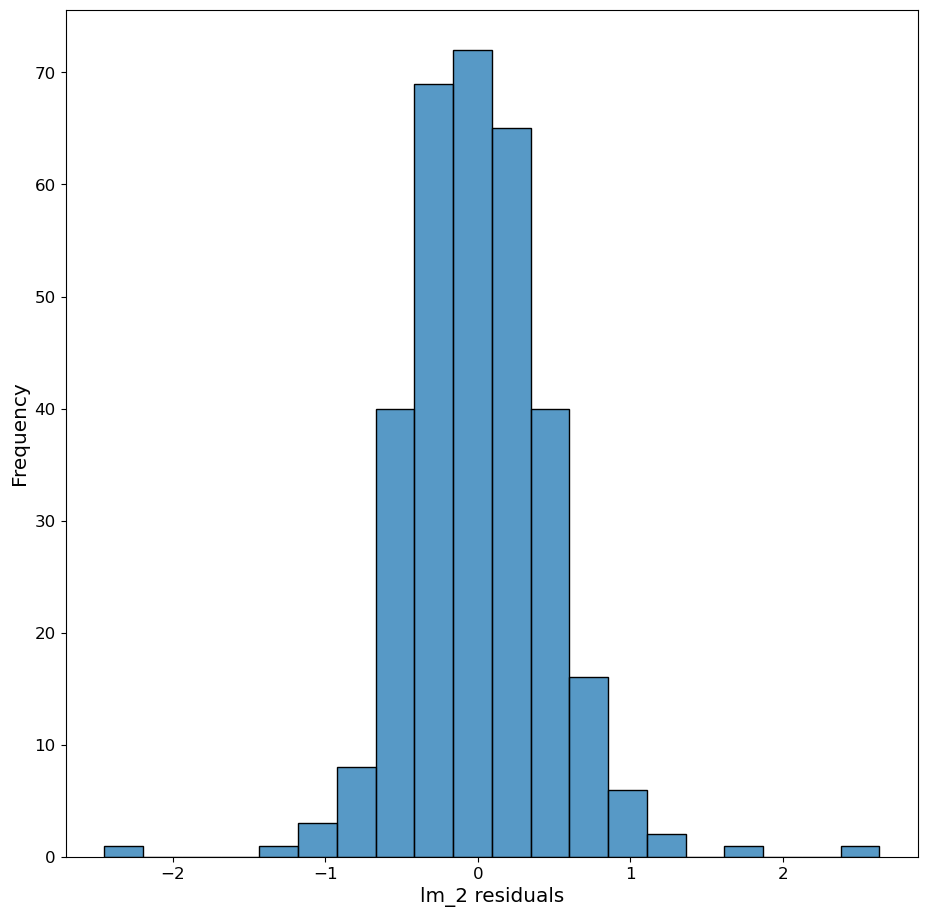

In [37]:
ax = sns.histplot(lm_2.resid, bins=20, kde=False)
ax.set_xlabel("lm_2 residuals")
ax.set_ylabel("Frequency")
plt.show()

Now for a bit of theory about the regression `log(1 + y) = a + b log(1 + x) + error`. A regression's error term is supposed to be normally distributed with mean equal to 0 and standard deviation equal to the residual standard error. In order to forecast y (e.g., calculate its mean given some new x's), we need to unwind the log transformation. The exponential function exp() unwinds the log function log(). Let `E[y|x]` denote the mean of y given some new x's (i.e. the prediction of y given the x). Then, we have `E[y|x] = exp(a + b log(1 + x)) E[exp(error)] - 1`. Note that if `E[exp(error)]` is `1`, then this doesn't affect our prediction, but it may not be for the model.

This means that we need to compute `E[exp(error)]` in order to predict the value of the box office revenue using our regression formula. We do this below.

In [38]:
expectedExpOfError_2 = np.mean(np.exp(np.random.normal(0, 
                                                       (lm_2.mse_resid)**(1/2),
                                                       1000000)))
expectedExpOfError_2

1.119365995725539

## Optimization

Now that we've built a predictive model, we need to actually use it for something. The goal is to optimize the ad spend for week 2. Let's take our `lm_2` model, and then use that to compute a counterfactual value for our week 2 revenue (i.e. the revenue we predict we would have gotten if we had spent `x` on ads in week 2).

ATO Pictures is the distributor, and they only get part of the money. Assume distributors receive 40% of box office revenues. Create a function to predict the Week 2 profit for Casino Jack.

This will be easier if we create a new dataset with only one row, and that row being the "Casino Jack" data. Let's do that.

In [40]:
film = df.loc[df["Title"] == "Casino Jack"]

Now we need to define a function. We've seen this above, but this is a little different. This function `return`s something, i.e. when you run the function you get something back. It also has two parameters, but the second parameter is funny. It is already set equal to something! This is called a "default value" and when you use the function, you don't have to put anything in for that value. This second value is used to optimize this function later on, but basically, if you set `sign=-1` when you call the function, it makes the whole function the negative version of the original.

The below function is really just unwinding our log transform from above. If you look carefully it mirrors the equation `E[y|x] = exp(a + b log(1 + x)) E[exp(error)] - 1` (but with more regressors). Then it returns the distributors portion of the revenue minus the ad spend (the distributors profits).

In [41]:
def CasinoJackProfit(x, sign=1):
    revenue = exp(lm_2.params['Intercept'] + \
                  lm_2.params['np.log(1 + Ad_2)']*log(1 + x) + \
                  lm_2.params['np.log(1 + BO_1)']*log(1 + film["BO_1"].iloc[0]) + \
                  lm_2.params['np.log(1 + Screens_2)']*log(1 + film["Screens_2"].iloc[0]) + \
                  # This is because Casino Jack is an R rated movie
                  lm_2.params['C(Q("MPAA Rating") == "R")[T.True]']*(1) + \
                  lm_2.params['np.log(1 + Ad_2):Q("RT Critic")'] * log(1 + x) * film["RT Critic"].iloc[0]) * expectedExpOfError_2 - 1
    return sign*(revenue * 0.4 - x)

Below are the characteristics of Casino Jack going into Week 2. Note that I append `.values[0]`. This is because, if you don't do this, it returns a one element pandas series, which looks a little funny. This way it gives just the number. The `[0]` is because `.values` returns an "array" (like a dataframe without column names) and the `[0]` says get the first thing in the array (which happens to be the only thing in this case). I'd suggest you play around with this and see what happens when you change things.

In [42]:
film["BO_1"].values[0]

61262

In [43]:
film["Screens_2"].values[0]

14.71428571

In [44]:
film["MPAA Rating"].values[0]

'R'

In [45]:
film["RT Critic"].values[0]

0.36

Now we will use general-purpose optimization function `minimize_scalar` to find the optimal ad spend. The `args=(-1,)` is there to set that optional paramater (`sign`) to `-1`. This is because this function _minimizes_ the given function, but we want to _maximize_ revenue. If we set `sign=-1` then the function returns the negative of the revenue, and _minimizing the negative of a function_ is equivalent to _maximizing the original function_.

The optimal value is a "property" of the `res` object called `x`. So, to get the value, we access it by `res.x`.

In [47]:
res = minimize_scalar(CasinoJackProfit, args=(-1,))
res.x

/tmp/ipykernel_128/3417284598.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + BO_1)']*log(1 + film["BO_1"]) + \
/tmp/ipykernel_128/3417284598.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + Screens_2)']*log(1 + film["Screens_2"]) + \
/tmp/ipykernel_128/3417284598.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  revenue = exp(lm_2.params['Intercept'] + \
/tmp/ipykernel_128/3417284598.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + BO_1)']*log(1 + film["BO_1"]) + \
/tmp/ipykernel_128/3417284598.py:5: FutureWarning

3731.4674967510946

What is the expected profit if we use the optimal value?

In [49]:
CasinoJackProfit(res.x)

/tmp/ipykernel_128/3417284598.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + BO_1)']*log(1 + film["BO_1"]) + \
/tmp/ipykernel_128/3417284598.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + Screens_2)']*log(1 + film["Screens_2"]) + \
/tmp/ipykernel_128/3417284598.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  revenue = exp(lm_2.params['Intercept'] + \


13474.945763499345

Plot ATO's Week-2 profits as a function of ad spend. The red line indicates the computed optimal value. How did our optimization do?

/tmp/ipykernel_128/3417284598.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + BO_1)']*log(1 + film["BO_1"]) + \
/tmp/ipykernel_128/3417284598.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + Screens_2)']*log(1 + film["Screens_2"]) + \
/tmp/ipykernel_128/3417284598.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  revenue = exp(lm_2.params['Intercept'] + \
/tmp/ipykernel_128/3417284598.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + BO_1)']*log(1 + film["BO_1"]) + \
/tmp/ipykernel_128/3417284598.py:5: FutureWarning

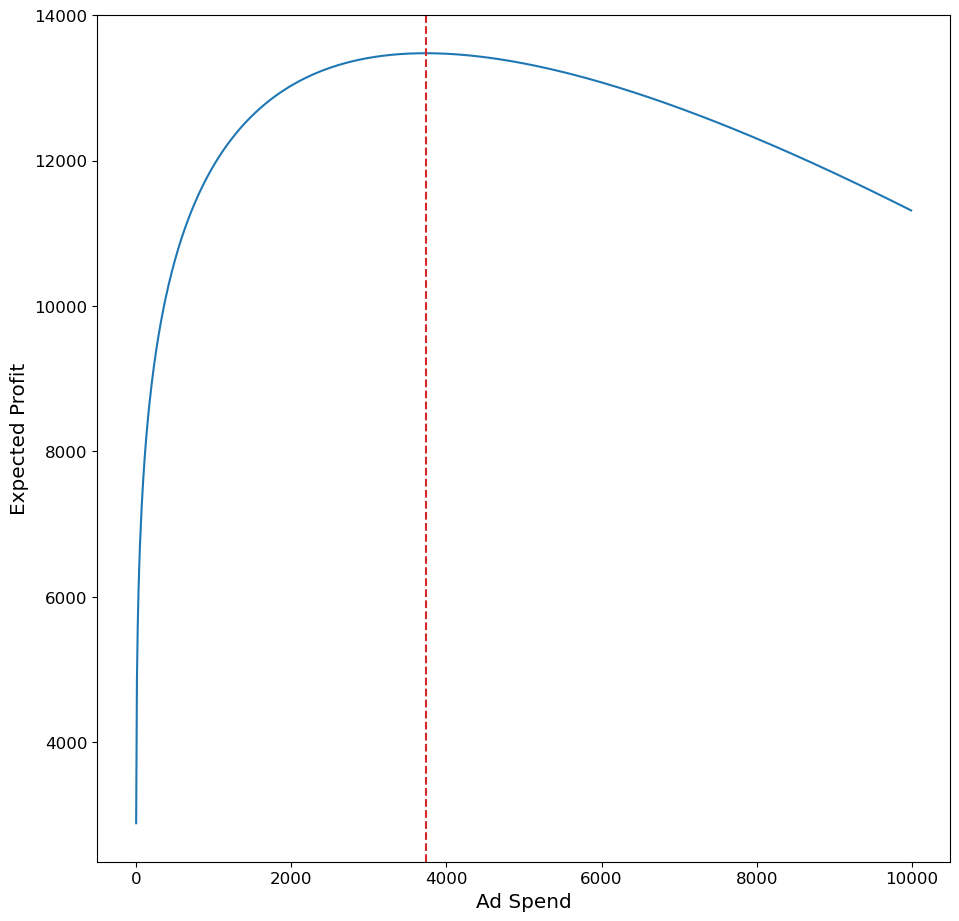

In [50]:
x = range(0,10000,10)
y = [CasinoJackProfit(ad_spend) for ad_spend in x]

plt.plot(x,y)
plt.axvline(x=res.x, linestyle='--', color='tab:red')
plt.xlabel("Ad Spend")
plt.ylabel("Expected Profit")
plt.show()

What did ATO actually spend and how did the movie do?

In [51]:
film["Ad_2"].values[0]

246000

In [52]:
film["BO_2"].values[0]

92655

In [53]:
film["BO_2"].values[0]*.4 - film["Ad_2"].values[0]

-208938.0

In [54]:
film["Total_Ad"].values[0]

1491700

In [55]:
film["Total_BO"].values[0]

937943

In [56]:
film["Total_BO"].values[0]*.4 - film["Total_Ad"].values[0]

-1116522.8

How good was the regression's box-office revenue prediction in Week 2 based on actual spend?

In [57]:
(CasinoJackProfit(film["Ad_2"].values[0]) + film["Ad_2"].values[0])/0.4

/tmp/ipykernel_128/3417284598.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + BO_1)']*log(1 + film["BO_1"]) + \
/tmp/ipykernel_128/3417284598.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lm_2.params['np.log(1 + Screens_2)']*log(1 + film["Screens_2"]) + \
/tmp/ipykernel_128/3417284598.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  revenue = exp(lm_2.params['Intercept'] + \


106708.10217718194

In [58]:
film["BO_2"].values[0]

92655

# Your Turn

Now, repeat the above optimization analysis but for a different movie (pick any movie you would like). I would recommend copying the blocks of code from the optimization section and pasting them below (note that you can copy whole blocks by selecting the cells, then going to "Edit -> Copy Cells") and then editing them. You shouldn't have to change much. Good luck!

In [74]:
film_new = df.loc[df["Title"] == "No Country For Old Men"]
film_new["Ad_2"].values[0]
film_new["BO_1"].values[0]
film_new["Screens_2"].values[0]
film_new["MPAA Rating"].values[0]
film_new["RT Critic"].values[0]
# Now we will use general-purpose optimization function `minimize_scalar` to find the optimal ad spend. The `args=(-1,)` is there to set that optional paramater (`sign`) to `-1`. This is because this function _minimizes_ the given function, but we want to _
#

0.95

In [75]:
print("BO_1:", float(film_new["BO_1"].iloc[0]))
print("Screens_2:", float(film_new["Screens_2"].iloc[0]))
print("MPAA Rating:", film_new["MPAA Rating"].iloc[0])
print("RT Critic:", float(film_new["RT Critic"].iloc[0]))


BO_1: 1586046.0
Screens_2: 308.8571429
MPAA Rating: R
RT Critic: 0.95


In [78]:
def movieProfit(x, sign=1):
    revenue = exp(lm_2.params['Intercept'] + \
                  lm_2.params['np.log(1 + Ad_2)']*log(1 + x) + \
                  lm_2.params['np.log(1 + BO_1)']*log(1 + float(film_new["BO_1"].iloc[0])) + \
                  lm_2.params['np.log(1 + Screens_2)']*log(1 + float(film_new["Screens_2"].iloc[0])) + \
                  lm_2.params['C(Q("MPAA Rating") == "R")[T.True]']*(1) + \
                  lm_2.params['np.log(1 + Ad_2):Q("RT Critic")'] * log(1 + x) * float(film_new["RT Critic"].iloc[0])) * expectedExpOfError_2 - 1
    return sign*(revenue * 0.4 - x)
# Below are the characteristics of Casino Jack going into Week 2. Note that I append `.values[0]`. This is because, if you don't do this, it returns a one element pandas series, which looks a little funny. This way it gives just the number. The `[0]`
# is because `.values` returns an "array" (like a dataframe without column names) and the `[0]` says get the first thing in the array (which happens to be the only thing in this case). I'd suggest you play around with this and see what happens when you change things.
#

In [79]:
res_new = minimize_scalar(movieProfit, args=(-1,))
print("Optimal ad spend for Example Movie:", res_new.x)
print("Expected profit for optimal ad spend:", movieProfit(res_new.x))
print("Expected profit for actual ad spend:", movieProfit(film_new["Ad_2"].iloc[0]))
print("Ad_2:", float(film_new["Ad_2"].iloc[0]))
print("BO_2:", float(film_new["BO_2"].iloc[0]))
print("Profit:", float(film_new["BO_2"].iloc[0])*0.4 - float(film_new["Ad_2"].iloc[0]))
print("Total_Ad:", float(film_new["Total_Ad"].iloc[0]))
print("Total_BO:", float(film_new["Total_BO"].iloc[0]))
print("Profit:", float(film_new["Total_BO"].iloc[0])*0.4 - float(film_new["Total_Ad"].iloc[0]))
# # Conclusion
predicted_revenue = (movieProfit(float(film_new["Ad_2"].iloc[0])) + float(film_new["Ad_2"].iloc[0]))/0.4
print("Predicted Revenue:", predicted_revenue)
print("Actual Revenue:", float(film_new["BO_2"].iloc[0]))
print("Profit:", predicted_revenue - float(film_new["BO_2"].iloc[0]))
print("Total_Ad:", float(film_new["Total_Ad"].iloc[0]))
print("Total_BO:", float(film_new["Total_BO"].iloc[0]))
print("Profit:", predicted_revenue - float(film_new["Total_BO"].iloc[0]))
# # References
#

Optimal ad spend for Example Movie: 298033.3025147407
Expected profit for optimal ad spend: 842876.0253845942
Expected profit for actual ad spend: -2749917.1390824406
Ad_2: 5151900.0
BO_2: 5935610.0
Profit: -2777656.0
Total_Ad: 26380500.0
Total_BO: 41240002.0
Profit: -9884499.2
Predicted Revenue: 6004957.152293898
Actual Revenue: 5935610.0
Profit: 69347.15229389817
Total_Ad: 26380500.0
Total_BO: 41240002.0
Profit: -35235044.8477061
